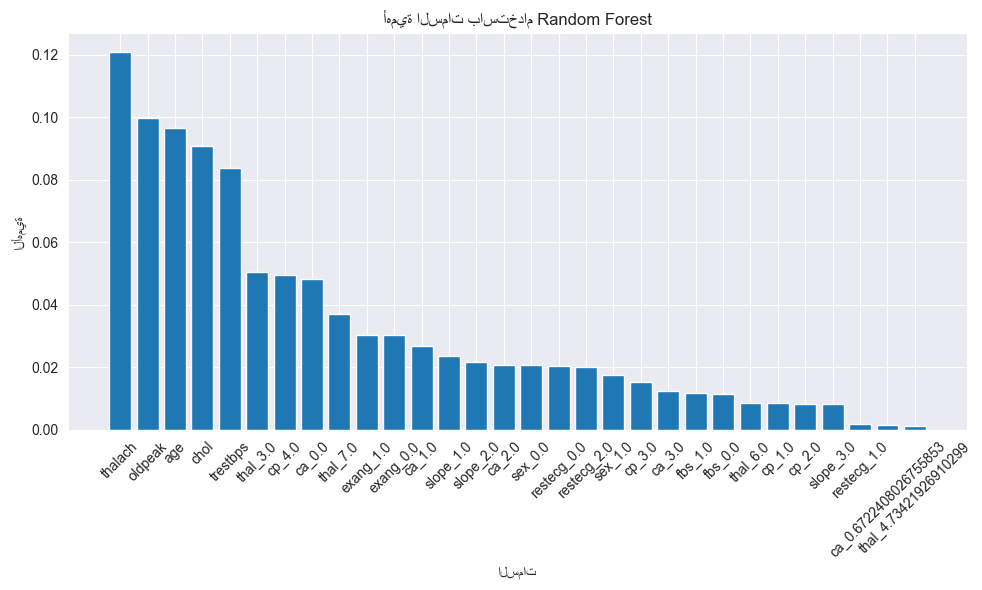

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2
from sklearn.preprocessing import MinMaxScaler
import os

# التأكد من وجود المجلدات
os.makedirs('../results/evaluation', exist_ok=True)
os.makedirs('../data', exist_ok=True)

# تحميل البيانات المعالجة
data_processed = pd.read_csv('../data/processed_heart_disease.csv')
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data_original = pd.read_csv(url, names=columns)
data_original = data_original.replace('?', np.nan)
data_original['ca'] = data_original['ca'].astype(float)
data_original['thal'] = data_original['thal'].astype(float)
data_original = data_original.fillna(data_original.mean())
y = data_original['target']
X = data_processed

# أهمية السمات باستخدام Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# رسم أهمية السمات
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=45)
plt.xlabel('السمات')
plt.ylabel('الأهمية')
plt.title('أهمية السمات باستخدام Random Forest')
plt.tight_layout()
plt.savefig('../results/evaluation/feature_importance.png')
plt.show()

# RFE لاختيار السمات
n_features_to_select = 10  # اختيار 10 سمات كمثال
rfe = RFE(estimator=rf, n_features_to_select=n_features_to_select)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]

# اختبار Chi-Square (يتطلب بيانات غير سالبة)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
chi_scores, _ = chi2(X_scaled, y)
chi_scores = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi_scores})

# حفظ البيانات المختارة
selected_data = X[selected_features]
selected_data.to_csv('../data/selected_features.csv', index=False)

# حفظ نتائج Chi-Square
chi_scores.to_csv('../results/evaluation/chi_square_scores.csv', index=False)